In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from data_loader import DataLoader
from trainer import UnetTrainer
from models.model import UnetModel
from utils import process_config
from logger import Logger
from PIL import Image

In [2]:
config = process_config('./configs/ipython_viz_config.json')
palette_image = Image.open(config.palette_image)

In [3]:
data = DataLoader(config)
model = UnetModel(config)
sess = tf.Session()
logger = Logger(sess, config)
trainer = UnetTrainer(sess, model, data, config, logger)

Instructions for updating:
Use the retry module or similar alternatives.


In [4]:
trainer.train()

Validation:   0%|                                                                                 | 0/2 [00:00<?, ?it/s]

Global step: 10
Training: loss 53.246124267578125, accuracy 0.0059791565872728825


Validation: 100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.94s/it]

Test: accuracy 0.0183105431497097


In [ ]:
trainer.validate()    

(6, 3024, 4032)


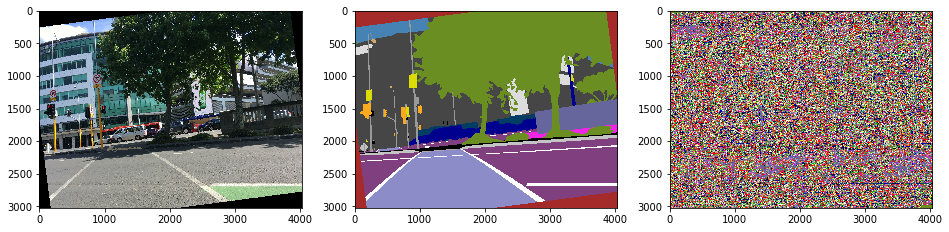

In [7]:
sess.run(data.val_iterator.initializer)
    
orig_x, orig_y, x, y = sess.run(data.val_next)
    
p = trainer.predict(orig_x, x)
p = np.squeeze(p)
print(p.shape)
    
    # #     print(orig.shape, img_x.shape, img_y.shape)
    #     img_x = x[1]
    #     img_y = y[1]
    # #     print(img_x.min(), img_x.max(), img_y.min(), img_y.max())

    #     fig = plt.figure(figsize=(32, 32))
    #     img_y = Image.fromarray(np.uint8(np.squeeze(img_y))).quantize(palette=palette_image)
    #     plt.subplot(1, 2, 1)
    #     plt.imshow(np.uint8(img_x))
    #     plt.subplot(1, 2, 2)
    #     plt.imshow(img_y)

idx = 3
fig = plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(np.uint8(orig_x[idx]))
plt.subplot(1, 3, 2)
label = Image.fromarray(np.uint8(np.squeeze(orig_y[idx]))).quantize(palette=palette_image)
plt.imshow(label)
plt.subplot(1, 3, 3)
img_y = Image.fromarray(np.uint8(p[idx])).quantize(palette=palette_image)
plt.imshow(img_y)